In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
taxiData = pd.read_csv('yellow_tripdata_2015-06.csv')
taxiData.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0,0.5,0.00,0,0.3,17.80
1,2,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,-73.971443,40.758942,1,N,-73.978539,40.761909,1,6.5,0,0.5,1.00,0,0.3,8.30
2,2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0,0.5,2.20,0,0.3,11.00
3,2,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,-73.945892,40.773529,1,N,-73.971527,40.760330,1,13.5,0,0.5,2.86,0,0.3,17.16
4,1,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,-73.979088,40.776772,1,N,-73.982162,40.758999,2,9.5,0,0.5,0.00,0,0.3,10.30


In [3]:
type(taxiData['tpep_pickup_datetime'])

pandas.core.series.Series

In [4]:
taxiData['tpep_pickup_datetime'] = pd.to_datetime(taxiData['tpep_pickup_datetime'])
taxiData['tpep_dropoff_datetime'] = pd.to_datetime(taxiData['tpep_pickup_datetime'])

In [5]:
taxiData['Day'] = pd.DatetimeIndex(taxiData['tpep_pickup_datetime']).weekday
taxiData['Day'] = taxiData['Day'].map({
        0: 'Monday',
        1: 'Tuesday',
        2: 'Wednesday',
        3: 'Thursday',
        4: 'Friday',
        5: 'Saturday',
        6: 'Sunday'
    })

In [6]:
taxiData['Hour'] = pd.DatetimeIndex(taxiData['tpep_pickup_datetime']).hour

In [7]:
data = taxiData[['Hour', 'Day']].groupby(['Day', 'Hour']).size()

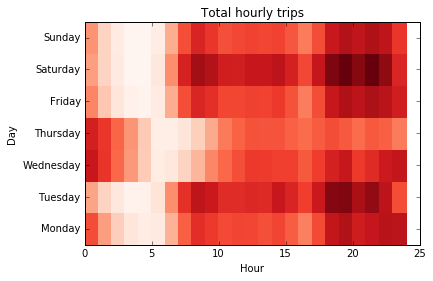

In [8]:
data = data.reshape(7, 24)
pos = np.arange(7) + 0.5
plt.pcolor(data, cmap = plt.cm.Reds)
plt.yticks(pos, ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))
plt.xlabel('Hour')
plt.ylabel('Day')
plt.title('Total hourly trips')

In [9]:
x = pd.read_csv('1.csv')

In [10]:
x

,Hour,Day,Total
0,1,1,10
1,1,2,10
2,1,1,15
3,1,2,20
4,2,2,5
5,2,1,6
6,2,2,4
7,2,1,9


In [11]:
x.groupby(['Hour', 'Day']).mean()

Total
Hour Day       
1    1     12.5
     2     15.0
2    1      7.5
     2      4.5

In [12]:
neighborhood = pd.read_csv('NHoodNameCentroids.csv')

In [13]:
neighborhood.shape

(299, 9)

In [14]:
neighborhood.head()

,the_geom,OBJECTID,Name,Stacked,AnnoLine1,AnnoLine2,AnnoLine3,AnnoAngle,Borough
0,POINT (-73.8472005205491 40.89470517661004),1,Wakefield,1,Wakefield,NaN,NaN,0,Bronx
1,POINT (-73.82993910812405 40.87429419303015),2,Co-op City,2,Co-op,City,NaN,0,Bronx
2,POINT (-73.82780644716419 40.88755567735082),3,Eastchester,1,Eastchester,NaN,NaN,0,Bronx
3,POINT (-73.90564259591689 40.895437426903875),4,Fieldston,1,Fieldston,NaN,NaN,0,Bronx
4,POINT (-73.91258546108577 40.89083449389134),5,Riverdale,1,Riverdale,NaN,NaN,0,Bronx


In [15]:
neighborhood['the_geom'][1]

'POINT (-73.82993910812405 40.87429419303015)'

In [16]:
neighborhood['the_geom'].replace('POINT ', '', inplace = True, regex = True)
neighborhood['the_geom'].replace(' ', ', ', inplace = True, regex = True)

In [17]:
neighborhood['the_geom'][1]

'(-73.82993910812405, 40.87429419303015)'

In [18]:
type(neighborhood['the_geom'][1])

str

In [19]:
import ast

In [20]:
neighborhood['the_geom'] = [ast.literal_eval(x) for x in neighborhood['the_geom']]

In [21]:
neighborhood.head()

,the_geom,OBJECTID,Name,Stacked,AnnoLine1,AnnoLine2,AnnoLine3,AnnoAngle,Borough
0,"(-73.8472005205, 40.8947051766)",1,Wakefield,1,Wakefield,NaN,NaN,0,Bronx
1,"(-73.8299391081, 40.874294193)",2,Co-op City,2,Co-op,City,NaN,0,Bronx
2,"(-73.8278064472, 40.8875556774)",3,Eastchester,1,Eastchester,NaN,NaN,0,Bronx
3,"(-73.9056425959, 40.8954374269)",4,Fieldston,1,Fieldston,NaN,NaN,0,Bronx
4,"(-73.9125854611, 40.8908344939)",5,Riverdale,1,Riverdale,NaN,NaN,0,Bronx


In [22]:
type(neighborhood['the_geom'][1])

tuple

In [23]:
earth_radius_miles = 3956.0

def get_shortest(lat, lon, nhood):
    nhood_lats = [i[1] for i in nhood]
    nhood_lons = [i[0] for i in nhood]
    dlat = np.radians(nhood_lats) - np.radians(lat)
    dlon = np.radians(nhood_lons) - np.radians(lon)
    a = np.square(np.sin(dlat / 2.0)) + np.cos(np.radians(lat)) * np.cos(np.radians(nhood_lats)) * np.square(np.sin(dlon / 2.0))
    great_circle_distance = 2 * np.arcsin(np.minimum(np.sqrt(a), np.repeat(1, len(a))))
    d = earth_radius_miles * great_circle_distance
    return np.argmin(d)

x = get_shortest(40.89543, -73.9056, neighborhood['the_geom'])
print neighborhood['Name'][x]

Fieldston


In [24]:
index = [get_shortest(i, j, neighborhood['the_geom']) for i, j in zip(taxiData['pickup_latitude'], taxiData['pickup_longitude'])]

In [66]:
taxiData['nhood'] = neighborhood['Name'][index].tolist()
taxiData['borough'] = neighborhood['Borough'][index].tolist()

In [67]:
taxiData['borough'].value_counts()

Manhattan        11168941
Queens             905890
Brooklyn           232754
Bronx               14395
Staten Island        2955
Name: borough, dtype: int64

In [69]:
taxiData['nhood'].value_counts()[1:10]

Midtown South      810134
Lincoln Square     805913
Sutton Place       782655
Flatiron           632887
Clinton            607555
Chelsea            563376
Lenox Hill         483233
Murray Hill        475388
Upper West Side    445725
Name: nhood, dtype: int64